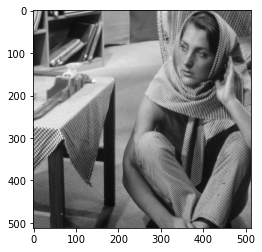

In [1]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_data
from core.utils import Mask

import numpy as np
import matplotlib.pyplot as plt


DATA_DIR = r".\imgs"

img = load_data(DATA_DIR)[0] / 255

plt.imshow(img, cmap='gray')

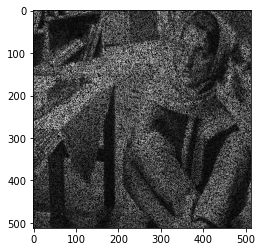

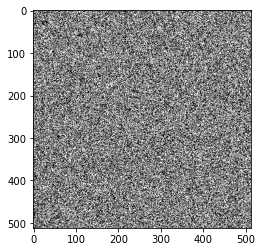

In [5]:
MODE = "random"
mask = Mask(mode=MODE, prcnt=0.5)

corrupted , mask =  mask(img)
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

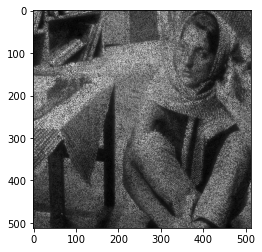

In [6]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=np.std(mask), stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

plt.imshow(denoised*(1-mask)+ corrupted, cmap='gray')

ITERATION 29 - ERRROR 29.214338389030864


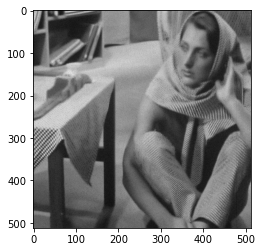

In [7]:
from core.admm import ADMM


admm = ADMM()

    
estimated = admm.restore(corrupted, mask, sol=img, iters=30)


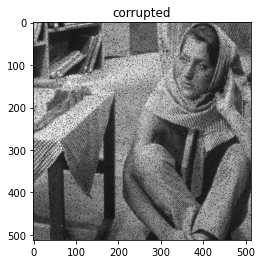

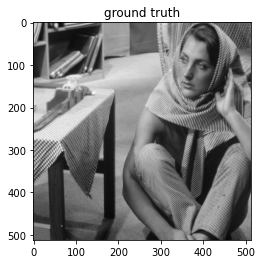

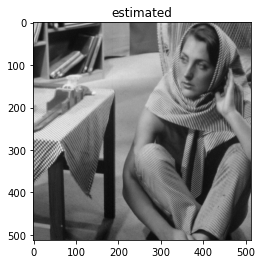

In [ ]:
plt.title("corrupted")
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.title("ground truth")
plt.imshow(img, cmap='gray')
plt.show()


plt.title("estimated")
plt.imshow(estimated, cmap='gray')
plt.show()

In [ ]:
# ! pip install bm3d